# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_OLSm_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [147]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (13, 8)

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Functions

In [148]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):
    
    def template_checker(HEX):
        submission_df = (HEX["CODIGO MUNICIPIO"].astype("string") + HEX["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        template_df = (template["CODIGO MUNICIPIO"].astype("string") + template["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        check_df = pd.DataFrame({"submission_df":submission_df,"template_df":template_df})
        check_df["check"] = check_df.submission_df == check_df.template_df
        if (check_df.check == False).any():
            pd.options.display.max_rows = 112
            return check_df.loc[check_df.check == False,:]
        else:  
            return "All Municipality Names and Codes to be submitted match the Template"
    
    print("Submission form Shape is", HEX.shape)
    print("Number of Municipalities is", HEX["CODIGO MUNICIPIO"].nunique())
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

    assert HEX.shape == (112, 3), "Error: Shape is incorrect."
    assert HEX["CODIGO MUNICIPIO"].nunique() == 112, "Error: Number of unique municipalities is correct."    
    return template_checker(HEX)

## Get the data

In [149]:
QUEEN_train = pd.read_csv('../Feeder_months/WBds03_QUEENtrainMONTHS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_months/WBds03_QUEENpredictMONTHS.csv', sep=',')

clustersMario = pd.read_csv("../auxiliary_files/WBds_CLUSTERSnests.csv")

template = pd.read_csv("../../../Input_open_data/ds01_PLANTILLA-RETO-AVISPAS-KOPURU.csv",sep=";", encoding="utf-8")

In [150]:
#QUEEN_predict.isnull().sum()

In [151]:
QUEEN_train.shape

(2688, 43)

In [152]:
QUEEN_predict.shape

(1344, 43)

## Add in more Clusters (nest amount clusters)

In [153]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [154]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [155]:
QUEEN_train.shape

(2688, 44)

In [156]:
QUEEN_predict.shape

(1344, 44)

In [157]:
#QUEEN_train.isnull().sum()

In [158]:
#QUEEN_predict.isnull().sum()

In [159]:
QUEEN_train.Cluster.value_counts()

0.0    1584
2.0     984
1.0      96
4.0      24
Name: Cluster, dtype: int64

## Determine feature importance

In [160]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code', 'station_name', 'year'])

In [161]:
y = QUEEN_train['NESTS']

In [162]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [163]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: month, Score: 1.54334
Feature: year_offset, Score: -1.62404
Feature: colonies_amount, Score: 1.68467
Feature: food_fruit, Score: 2.27094
Feature: food_apple, Score: -1.09452
Feature: food_txakoli, Score: 1.16425
Feature: food_kiwi, Score: -0.06580
Feature: food_pear, Score: 0.38219
Feature: food_blueberry, Score: 1.24410
Feature: food_raspberry, Score: 1.12594
Feature: weath_days_frost, Score: 0.51534
Feature: weath_humidity, Score: 1.47397
Feature: weath_maxLevel, Score: 1.83954
Feature: weath_midLevel, Score: -1.59402
Feature: weath_minLevel, Score: -0.90977
Feature: weath_days_rain, Score: -0.59735
Feature: weath_days_rain1mm, Score: 0.44514
Feature: weath_accuRainfall, Score: 1.63346
Feature: weath_10minRainfall, Score: -0.86744
Feature: weath_1dayRainfall, Score: -0.99070
Feature: weath_solar, Score: 0.04989
Feature: weath_meanTemp, Score: -9.04830
Feature: weath_maxTemp, Score: 0.54039
Feature: weath_maxMeanTemp, Score: 3.90312
Feature: weath_minTemp, Score: 9.47661
Feat

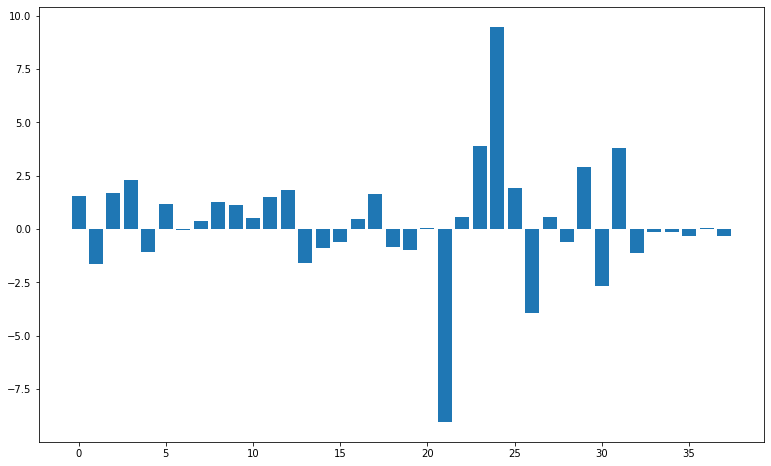

In [164]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [166]:
for i,v in enumerate(importance):
    if abs(v) > 1:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: month, Score: 1.54
Feature: year_offset, Score: -1.62
Feature: colonies_amount, Score: 1.68
Feature: food_fruit, Score: 2.27
Feature: food_apple, Score: -1.09
Feature: food_txakoli, Score: 1.16
Feature: food_blueberry, Score: 1.24
Feature: food_raspberry, Score: 1.13
Feature: weath_humidity, Score: 1.47
Feature: weath_maxLevel, Score: 1.84
Feature: weath_midLevel, Score: -1.59
Feature: weath_accuRainfall, Score: 1.63
Feature: weath_meanTemp, Score: -9.05
Feature: weath_maxMeanTemp, Score: 3.90
Feature: weath_minTemp, Score: 9.48
Feature: weath_meanWindM, Score: 1.94
Feature: weath_maxWindM, Score: -3.92
Feature: cluster_size, Score: 2.92
Feature: cluster_cosmo, Score: -2.69
Feature: cluster_survive, Score: 3.81
Feature: cluster_food, Score: -1.14


## Train the model

### With the variables suggested by the Feature Importance method

In [132]:
#model = ols('NESTS ~ month + colonies_amount + food_fruit + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_maxLevel + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

In [133]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + weath_maxWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

### Backward elimination

In [134]:
#model = ols('NESTS ~ month + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

In [135]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

### With the additional Cluster Categorical for nest amounts

In [136]:
model = ols('NESTS ~ month + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     114.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.01e-302
Time:                        17:23:12   Log-Likelihood:                -6578.2
No. Observations:                2688   AIC:                         1.319e+04
Df Residuals:                    2670   BIC:                         1.330e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.03

In [137]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size) + C(Cluster)',\
#            data=QUEEN_train).fit()
#print(model.summary())

## Predict 2020's nests

In [138]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       0.603378
1       0.474706
2       0.712249
3       1.261290
4       1.880131
          ...   
1339    2.427227
1340    2.279112
1341    2.247762
1342    2.185706
1343    1.737249
Length: 1344, dtype: float64

In [139]:
# Any municipality/month resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.603378
1       0.474706
2       0.712249
3       1.261290
4       1.880131
          ...   
1339    2.427227
1340    2.279112
1341    2.247762
1342    2.185706
1343    1.737249
Length: 1344, dtype: float64

In [140]:
QUEEN_predict['NESTS'] = y_2020

In [141]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

## Manual adjustments

In [142]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,7.596385
21,48022,Karrantza Harana/Valle de Carranza,21.785017
50,48051,Lanestosa,14.387176
70,48071,Muskiz,16.255934
73,48074,Urduña/Orduña,21.353797
87,48088,Ubide,11.145175


In [143]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = [0,0,1,0,1,0]

In [144]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,1.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,1.0
87,48088,Ubide,0.0


In [145]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [146]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2994


'All Municipality Names and Codes to be submitted match the Template'

## Export dataset for submission

In [112]:
HEX.to_csv('WaspBusters_20210609_batch_OLSy_48019prodigal.csv', index=False)